<a href="https://colab.research.google.com/github/ZahirulNiloyCodes/CSE_422_Project/blob/main/Copy_of_Cse422_Project_Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# @title Data Pre Processing
dataset=pd.read_csv('7.csv')
dataset=dataset.drop(columns=['Student ID'])
dataset=dataset.dropna(subset=['Diabetes',"Smoking"])
dataset=dataset.dropna(subset=["Gender"])
#print(dataset)
x_data=dataset.iloc[:,:-2].to_numpy()
y_nn=dataset.iloc[:,-2:].to_numpy()
y_diabetes=dataset.iloc[:,-2].to_numpy()
y_smoking=dataset.iloc[:,-1].to_numpy()
#print(y_diabetes)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[4])],remainder='passthrough')
le=LabelEncoder()
x_data[:,1]=le.fit_transform(x_data[:,1])
#print(x_data)
x_data=np.array(transformer.fit_transform(x_data))
#print(x_data[:1,:])
y_diabetes=le.fit_transform(y_diabetes)
y_smoking=le.fit_transform(y_smoking)
print(y_smoking)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x_data[:,7:])
x_data[:,7:]=imputer.transform(x_data[:,7:])
x_data[:,5:6]=imputer.fit_transform(x_data[:,5:6])
#print(x_data[:2,:])
x_data_panda=pd.DataFrame(x_data)
#print(x_data_panda)

[0 0 1 ... 0 1 0]


In [ ]:
 # @title Data Splitting and Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train_diabetes,x_test_diabetes,y_train_diabetes,y_test_diabetes=train_test_split(x_data,y_diabetes,test_size=0.2,random_state=42)#Logistic Regression
x_train_smoking,x_test_smoking,y_train_smoking,y_test_smoking=train_test_split(x_data,y_smoking,test_size=0.2,random_state=42)
scaler=StandardScaler()

x_train_diabetes=scaler.fit_transform(x_train_diabetes)
x_test_diabetes=scaler.transform(x_test_diabetes)
x_train_smoking=scaler.fit_transform(x_train_smoking)
x_test_smoking=scaler.transform(x_test_smoking)

In [ ]:
# @title Logistic Regression Diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
log_diabetes=LogisticRegression()
log_diabetes.fit(x_train_diabetes,y_train_diabetes)
y_pred_diabetes = log_diabetes.predict(x_test_diabetes)
print("Accuracy Score:", accuracy_score(y_test_diabetes,y_pred_diabetes)*100,"%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test_diabetes,y_pred_diabetes))
print("\nClassification Report:\n", classification_report(y_test_diabetes,y_pred_diabetes))

Accuracy Score: 90.03121676786388 %

Confusion Matrix:
 [[26245     0]
 [ 2906     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     26245
           1       0.00      0.00      0.00      2906

    accuracy                           0.90     29151
   macro avg       0.45      0.50      0.47     29151
weighted avg       0.81      0.90      0.85     29151



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# @title Logistic Regression Smoking
log_smoking=LogisticRegression()
log_smoking.fit(x_train_smoking,y_train_smoking)
y_pred_smoking=log_smoking.predict(x_test_smoking)
print("Accuracy Score:", accuracy_score(y_test_smoking,y_pred_smoking)*100,"%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test_smoking,y_pred_smoking))
print("\nClassification Report:\n", classification_report(y_test_smoking,y_pred_smoking))

Accuracy Score: 79.61647970910089 %

Confusion Matrix:
 [[23209     0]
 [ 5942     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     23209
           1       0.00      0.00      0.00      5942

    accuracy                           0.80     29151
   macro avg       0.40      0.50      0.44     29151
weighted avg       0.63      0.80      0.71     29151



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# @title Decision Tree Diabetes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
tree_diabetes=DecisionTreeClassifier(max_depth=5)
tree_diabetes.fit(x_train_diabetes, y_train_diabetes)
y_pred_dtree = tree_diabetes.predict(x_test_diabetes)
print("Diabetes Model Performance:")
print(classification_report(y_test_diabetes, y_pred_dtree))


Diabetes Model Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     26245
           1       0.25      0.00      0.00      2906

    accuracy                           0.90     29151
   macro avg       0.58      0.50      0.47     29151
weighted avg       0.84      0.90      0.85     29151



In [ ]:
# @title Decision Tree Smoking
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
tree_smoking=DecisionTreeClassifier(max_depth=5)
tree_smoking.fit(x_train_smoking, y_train_smoking)
y_pred_dsmoking = tree_smoking.predict(x_test_smoking)
print("Diabetes Model Performance:")
print(classification_report(y_test_smoking, y_pred_smoking))


Diabetes Model Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     23209
           1       0.00      0.00      0.00      5942

    accuracy                           0.80     29151
   macro avg       0.40      0.50      0.44     29151
weighted avg       0.63      0.80      0.71     29151



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# @title Neural Network Diabetes
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
mlp_diabetes=MLPClassifier(hidden_layer_sizes=(64, 32),activation='relu',solver='adam',max_iter=500,random_state=42)
mlp_diabetes.fit(x_train_diabetes, y_train_diabetes)
y_pred_mlp_diabetes=mlp_diabetes.predict(x_test_diabetes)
print(classification_report(y_test_diabetes, y_pred_mlp_diabetes))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     26245
           1       0.19      0.00      0.00      2906

    accuracy                           0.90     29151
   macro avg       0.55      0.50      0.48     29151
weighted avg       0.83      0.90      0.85     29151



In [ ]:
# @title Neural Network Smoking
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
mlp_smoking=MLPClassifier(hidden_layer_sizes=(64, 32),activation='relu',solver='adam',max_iter=500,random_state=42)
mlp_smoking.fit(x_train_smoking,y_train_smoking)
y_pred_mlp_smoking=mlp_smoking.predict(x_test_smoking)
print(classification_report(y_test_smoking,y_pred_mlp_smoking))


              precision    recall  f1-score   support

           0       0.80      1.00      0.88     23209
           1       0.26      0.01      0.01      5942

    accuracy                           0.79     29151
   macro avg       0.53      0.50      0.45     29151
weighted avg       0.69      0.79      0.71     29151



Best K based on Silhouette: 5
Cluster Centers (Original Scale):
           0    1    2    3    4          5         6           7          8  \
Cluster                                                                        
0        0.0  0.0  0.0  0.0  1.0  26.052045  0.507866  175.006807  69.908649   
1        0.0  0.0  1.0  0.0  0.0  26.028696  0.497739  175.007278  70.080608   
2        0.0  0.0  0.0  1.0  0.0  26.006691    0.4964  174.915043  69.938127   
3        1.0  0.0  0.0  0.0  0.0  26.088606  0.500585  174.872576  70.059042   
4        0.0  1.0  0.0  0.0  0.0  26.022916  0.503238  174.858481  69.861895   

                 9         10         11          12          13  
Cluster                                                           
0        23.294157  98.600192  79.617902  114.661265  184.351987  
1        23.336741  98.600992  79.449827  114.608937  184.873435  
2        23.341702  98.597027  79.543003   114.54992  184.468437  
3         23.40438  98.603274  79.479813

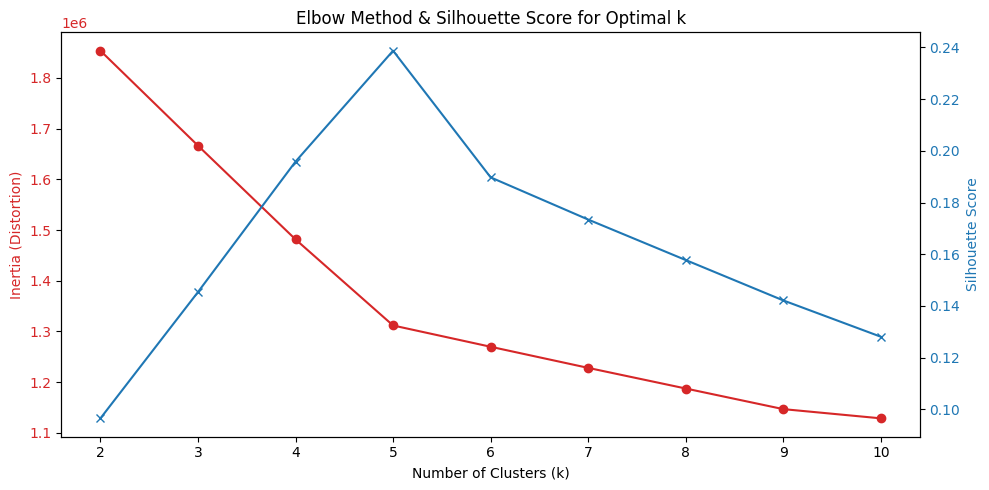

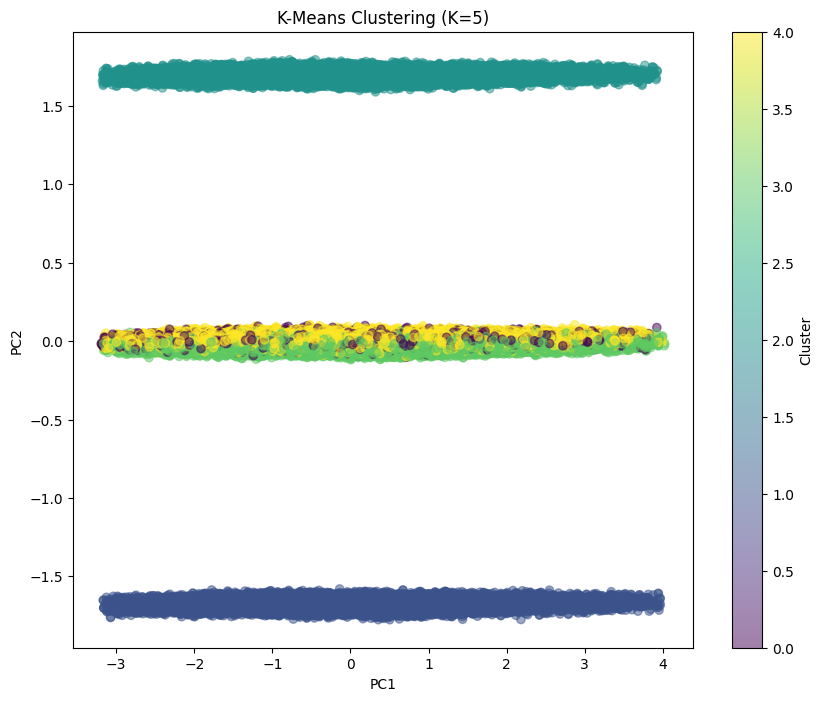

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

# 2. The Elbow Method & Silhouette Analysis
inertia = []
silhouette_scores = []
K_range = range(2, 11)

# We'll use a subset if the data is huge to speed up, but 140k rows is manageable for KMeans
# Let's just run it on 10% sample for speed in this demo environment if needed,
# but let's try full first or a larger sample (20k).
sample_indices = np.random.choice(x_scaled.shape[0], size=min(20000, x_scaled.shape[0]), replace=False)
x_sample = x_scaled[sample_indices]

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(x_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plotting Elbow and Silhouette
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Distortion)', color=color)
ax1.plot(K_range, inertia, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette_scores, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method & Silhouette Score for Optimal k')
fig.tight_layout()
plt.savefig('elbow_silhouette.png')

# 3. Apply Best K (Let's assume K=3 or pick programmatically)
# Usually, we look for the "Elbow" or max silhouette.
# I will simply print the scores to decide in the text, but for the code execution I'll pick k=3 as an example
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best K based on Silhouette: {best_k}")

final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = final_kmeans.fit_predict(x_scaled) # Run on full data

# 4. Cluster Interpretation
# Add cluster labels to the original (numerical part) dataframe to see means
x_data_panda['Cluster'] = clusters
# Define numerical columns for analysis
numeric_cols = x_data_panda.columns.drop('Cluster') # Exclude the newly added 'Cluster' column itself

# We need to handle the OneHot columns manually if we want to see Blood Type distribution,
# but let's look at numeric averages first.
numeric_analysis = x_data_panda.groupby('Cluster')[numeric_cols].mean()
print("Cluster Centers (Original Scale):")
print(numeric_analysis)

# 5. PCA Visualization for the Best K
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering (K={best_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.savefig('kmeans_final.png')

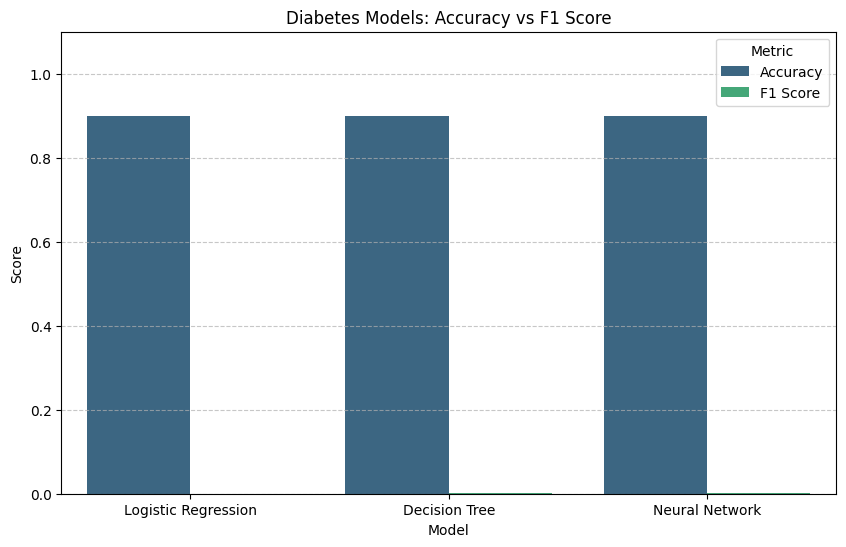

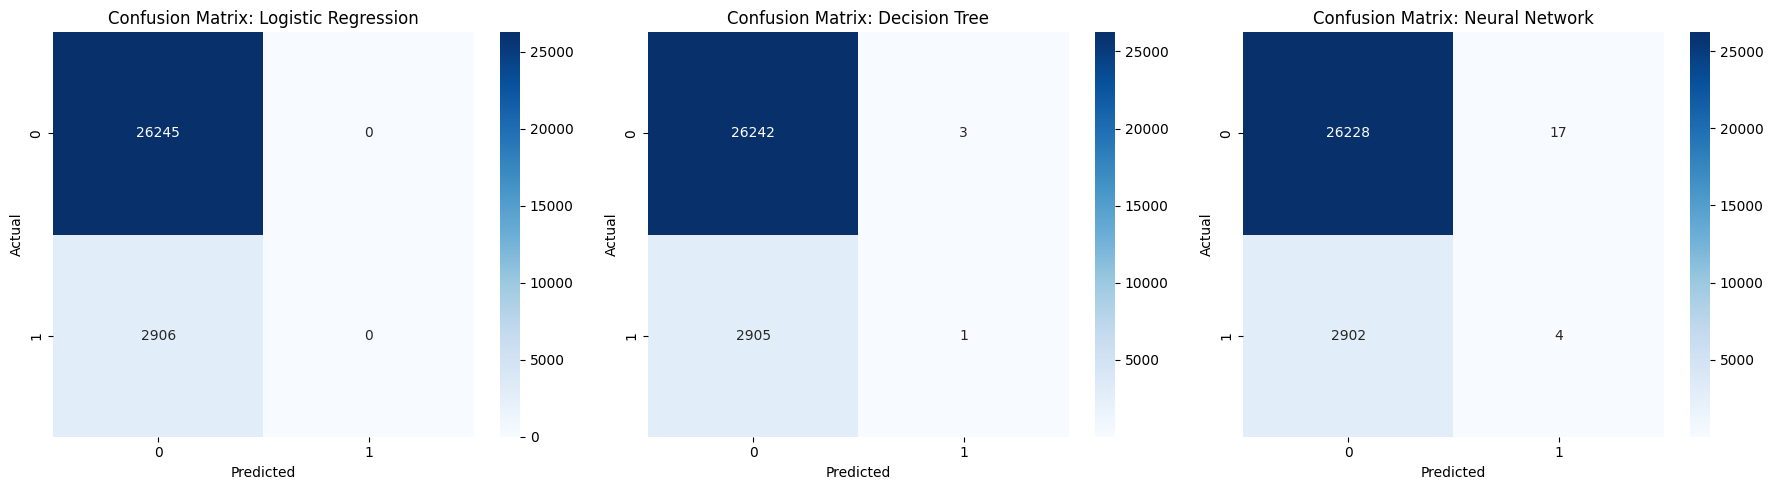

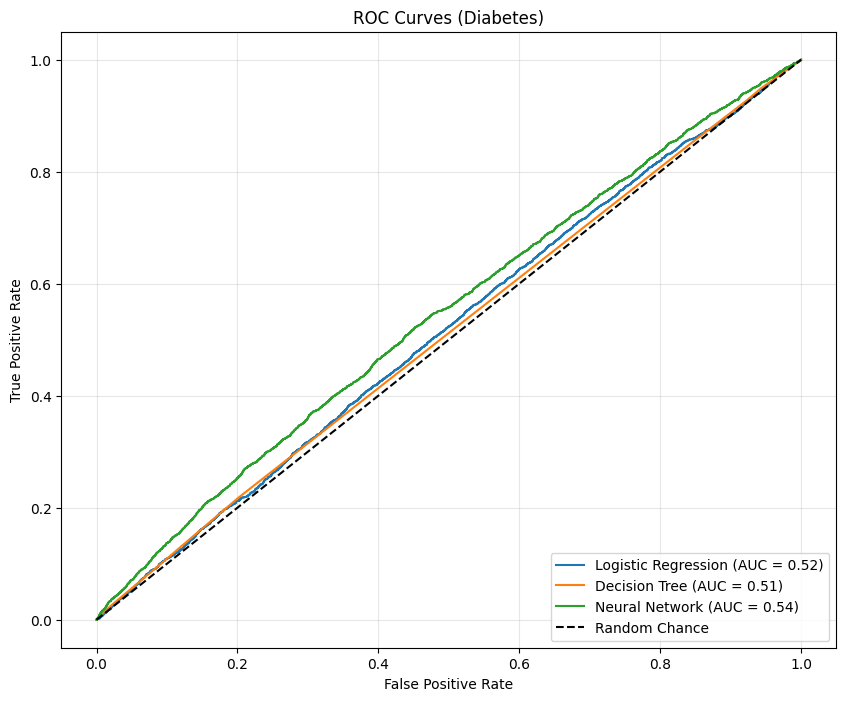

In [ ]:
# @title Model Evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# --- 1. SETUP: Use Your Existing Diabetes Models & Data ---
# We access the models you already created in previous cells
models = {
    "Logistic Regression": log_diabetes,
    "Decision Tree": tree_diabetes,
    "Neural Network": mlp_diabetes
}

# Use your existing scaled test data for Diabetes
X_test = x_test_diabetes
y_test = y_test_diabetes

results = {}

# --- 2. EVALUATE MODELS (No Retraining) ---
for name, model in models.items():
    # Predict
    y_pred = model.predict(X_test)

    # Get probabilities for ROC Curve
    # Neural Networks and Logistic Regression support predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For Decision Trees, predict_proba also works, giving 0 or 1
        y_prob = model.predict_proba(X_test)[:, 1]

    # Store metrics
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "y_pred": y_pred,
        "y_prob": y_prob
    }

# --- 3. PLOT 1: ACCURACY vs F1 SCORE (Bar Chart) ---
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [res['accuracy'] for res in results.values()],
    'F1 Score': [res['f1'] for res in results.values()]
})

plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_melted, palette="viridis")
plt.title("Diabetes Models: Accuracy vs F1 Score")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 4. PLOT 2: CONFUSION MATRICES ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# --- 5. PLOT 3: ROC CURVES & AUC ---
plt.figure(figsize=(10, 8))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Diabetes)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


<Axes: title={'center': 'Data Preview'}, ylabel='Frequency'>

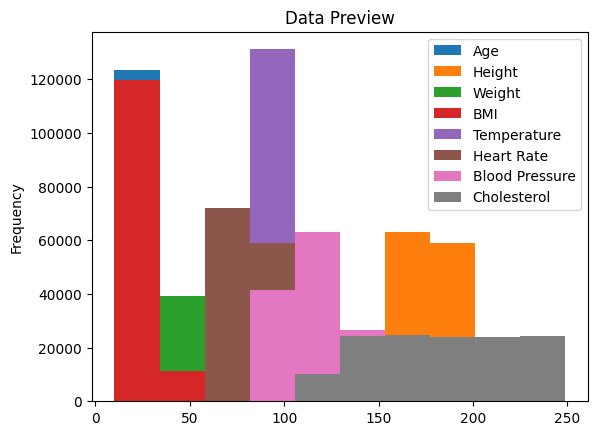

In [ ]:
# @title Data Analysis
dataset.plot(kind='hist',title='Data Preview')

<Axes: xlabel='Diabetes', ylabel='Amount'>

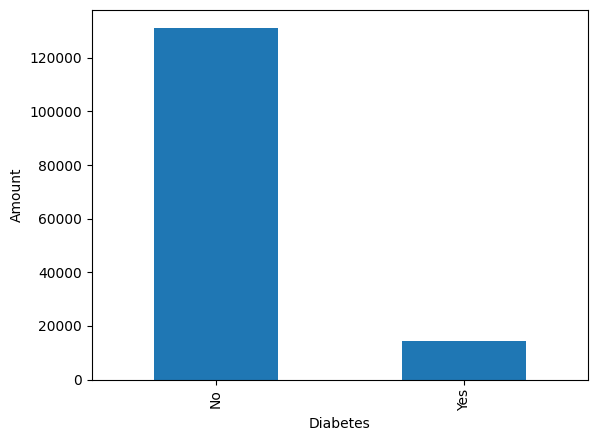

In [ ]:
dataset['Diabetes'].value_counts().plot(kind='bar',ylabel='Amount')

<Axes: xlabel='Smoking', ylabel='Amount'>

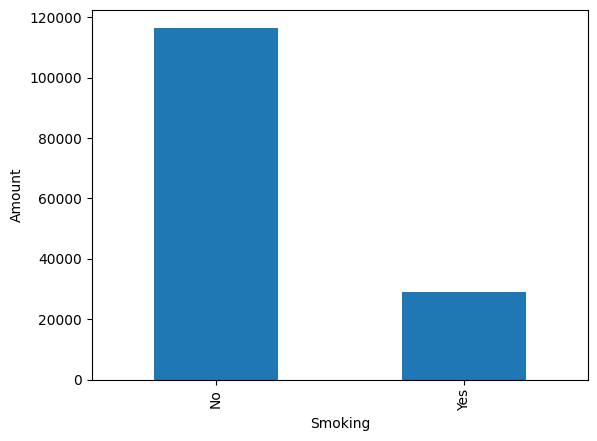

In [ ]:
dataset['Smoking'].value_counts().plot(kind='bar',ylabel='Amount')

In [ ]:
numerical_data=dataset.select_dtypes(include=['number'])
#print(numerical_data.columns.tolist())
numerical_data.describe()

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,131150.000000,131037.000000,131237.000000,131203.000000,131198.000000,131083.000000,131188.000000,131281.000000
mean,26.038063,174.923119,69.977597,23.344401,98.601304,79.509402,114.590245,184.476451
std,4.893100,14.453735,17.340783,7.036895,0.500061,11.533476,14.417322,37.571193
min,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,22.000000,162.482673,54.969200,17.864808,98.265184,70.000000,102.000000,152.000000
50%,26.000000,174.787564,69.999667,22.698017,98.600049,80.000000,115.000000,184.000000
75%,30.000000,187.456700,84.979899,28.024113,98.940905,89.000000,127.000000,217.000000
max,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [ ]:
categorical_data=dataset.select_dtypes(include=['object'])
#print(categorical_data.columns.tolist())
categorical_data.describe()

,Gender,Blood Type,Diabetes,Smoking
count,145755,131263,145755,145755
unique,2,4,2,2
top,Male,O,No,No
freq,72921,33193,131240,116597


In [ ]:
numerical_data.var()

,0
Age,23.942432
Height,208.910458
Weight,300.702752
BMI,49.517894
Temperature,0.250061
Heart Rate,133.021080
Blood Pressure,207.859167
Cholesterol,1411.594511


In [ ]:
numerical_data.skew()

,0
Age,-0.008618
Height,0.007335
Weight,0.003737
BMI,0.434649
Temperature,0.009709
Heart Rate,-0.002311
Blood Pressure,-0.005557
Cholesterol,0.004484
